<a href="https://colab.research.google.com/github/yuchenhe-xai/yccolab/blob/main/241205_local_grok_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import json
import pandas as pd
from IPython.display import display, Markdown
from IPython.display import HTML
import requests

In [ ]:
#@title just easy show conversation for debugging(ignore)
import inspect

# sys.path.append(os.path.expanduser('~/xai/train/'))

# import tkinter as tk
from IPython.display import HTML, display


def display_conversation(conversation, conv_loss_mask=None, ratings=None):
    """
    Display a conversation in a notebook with different colors for the 'user' and 'assistant' roles,
    and show thumbs up or down based on ratings.

    Parameters:
    - conversation (list of dict or str): List where each element can be a dictionary with 'role' and 'content' or just a string.
    - conv_loss_mask (list of bool): List of boolean values indicating whether to highlight the message.
    - ratings (list of str): List of strings where 'LIKE' means thumbs up, 'DISLIKE' means thumbs down.
    """
    user_bg_color = "#d0e7ff"  # light blue for user messages
    assistant_bg_color = "#d4edda"  # light green for assistant messages
    user_text_color = "#084298"  # darker blue for user text
    assistant_text_color = "#155724"  # darker green for assistant text
    html_output = ""
    roles_default = ["user", "assistant"]

    for i, entry in enumerate(conversation):
        if isinstance(entry, str):
            role = roles_default[i % 2]
            content = entry
        else:
            role = entry["role"]
            content = entry["content"]
        is_user = role.lower() in ["user", "human"]

        # Set color based on role
        bg_color = user_bg_color if is_user else assistant_bg_color
        text_color = user_text_color if is_user else assistant_text_color
        role_display = "User" if is_user else "Assistant"
        rating_display = ""

        # Add rating icon if ratings are provided
        if ratings and i < len(ratings):
            rating = ratings[i]
            if rating == 'LIKE':
                rating_display = "&#x1F44D;"  # Thumbs up emoji
            elif rating == 'DISLIKE':
                rating_display = "&#x1F44E;"  # Thumbs down emoji

        # Highlight if conv_loss_mask is True for this message
        highlight_style = "font-weight: bold; text-decoration: underline;" if conv_loss_mask and conv_loss_mask[i] else "font-weight: normal;"

        # Append each entry to HTML string with styling and rating icon
        html_output += f"""
        <div style='background-color: {bg_color}; color: {text_color};
                    border-radius: 8px; padding: 10px; margin: 8px 0;'>
            <strong style='{highlight_style}'>{role_display}:</strong> {rating_display}<br>
            <span style='{highlight_style}'>{content}</span>
        </div>
        """

    display(HTML(html_output))


# Loading GA Failure (diy) for understanding

In [ ]:
f = open("/Users/yuchen/data_diy_1203.json", "r")
s = f.read()
all_ga_data = json.loads(s)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/yuchen/data_ga_failure1205.json'

In [ ]:
all_ga_data_pd = pd.DataFrame(all_ga_data).T
all_ga_data_pd

,share_link,analyze_rating,topic,intent_taxonomy,image_failure,justification,userId,email,startTime,leadTime,passQA,feedback,reviewLevel,status
3tdDVV8xEP1mCt4NnToIB,https://x.com/i/grok/share/djIjjHLpZLS9MFc3an8...,Good,Celebrities,Explore Topic,No,I was curious to explore Denzel's highest-gros...,102921743168256604294,egonzalez@teachx.ai,1733295930650,388310,False,{'entries': []},0,done
ffGbPVTk7G9WIZ3O6GuZH,https://x.com/i/grok/share/ebiLdLnHL33g6cE8OUo...,Bad,Business & Finance & Crypto,What's That,No relevant images available,I was curious about Cramer's post because I wa...,102921743168256604294,egonzalez@teachx.ai,1733295384707,544509,False,{'entries': []},0,done
Tulnjo6xEHJT3IbDZZzIi,https://x.com/i/grok/share/2d5PAjsHEb6TKmRLq9E...,Bad,News,What's That,No,I was curious when the warmup was expected to ...,102921743168256604294,egonzalez@teachx.ai,1733295024957,358103,False,{'entries': []},0,done
QoX88qgGNqBYNaQeF50K3,https://x.com/i/grok/share/fcaxrpk5lXmpV6ij1gA...,Amazing,Sports,What's That,No,"After reading the headline, I was curious to u...",102921743168256604294,egonzalez@teachx.ai,1733294776958,246529,False,{'entries': []},0,done
es2pEhq70dnWsvQETZpYJ,https://x.com/i/grok/share/eDTh2DbmlWYLxepGmFy...,Good,Business & Finance & Crypto,Explore Topic,No,I was curious to explore the idea of Dollar Tr...,102921743168256604294,egonzalez@teachx.ai,1733294061266,663912,False,{'entries': []},0,done
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YnJHEgnlIAK1fRordR2rZ,https://x.com/i/grok/share/NqMbZNWOBbOdeUje8un...,Good,Gaming,Who's That,Yes,I was curious who this R. Michael Grenda is wh...,113142885891509347164,veke@teachx.ai,1733272424749,203313,False,{'entries': []},0,done
bTu4twnzOpQW0a035fkWm,https://x.com/i/grok/share/6RuoXHn0P07pKMmGck6...,Amazing,News,Memes/Humor Understanding,No,I wanted grok to explain the meme and the reas...,114879698220014387071,pholland@teachx.ai,1733269406215,39956,False,{'entries': []},0,done
WGHDx8NuV0eyh1DmZH9FC,https://x.com/i/grok/share/cZLptuQkVA8tCmMlxBA...,Bad,Celebrities,What's That,No,I was curious why Saad was dressed in a tux he...,114879698220014387071,pholland@teachx.ai,1733268026246,93659,False,{'entries': []},0,done
WG1ED2cUQmhBbbRc9nR18,https://x.com/i/grok/share/3xvWVTWsLIqGEa6ZAnn...,Amazing,Sports,Who's That,No,Who is Brashard Smith and what's so great abou...,115994592287986332694,gwhitten@teachx.ai,1733268261023,154225,False,{'entries': []},0,done


In [ ]:
bad_ga_data_pd = all_ga_data_pd[all_ga_data_pd['analyze_rating'] == 'Bad']
bad_ga_data_pd[bad_ga_data_pd['image_failure'] == 'No']

,share_link,analyze_rating,topic,intent_taxonomy,image_failure,justification,userId,email,startTime,leadTime,passQA,feedback,reviewLevel,status
Tulnjo6xEHJT3IbDZZzIi,https://x.com/i/grok/share/2d5PAjsHEb6TKmRLq9E...,Bad,News,What's That,No,I was curious when the warmup was expected to ...,102921743168256604294,egonzalez@teachx.ai,1733295024957,358103,False,{'entries': []},0,done
l6BJxaUI88RCPmz4mcj8j,https://x.com/i/grok/share/iInHatiFKC4EgIv7Brz...,Bad,Sports,Fact Checking,No,I was drawn to this post because this would be...,102921743168256604294,egonzalez@teachx.ai,1733291998464,458826,False,{'entries': []},0,done
vaCQK70t45XKvIx4q95Wo,https://x.com/i/grok/share/feVrZgxHIAfz5WBKIdT...,Bad,Celebrities,Memes/Humor Understanding,No,I wanted to understand why the tour dates are ...,102921743168256604294,egonzalez@teachx.ai,1733289684785,591568,False,{'entries': []},0,done
SszcX6O7OxG4zlvY4NDm6,https://x.com/i/grok/share/EJdmVM5nTJsdkjyEzTG...,Bad,Politics,Who's That,No,This post caught my attention because I had ne...,102921743168256604294,egonzalez@teachx.ai,1733289245778,437169,False,{'entries': []},0,done
h4JbzGCPMiuqTpwlZiiSE,https://x.com/i/grok/share/dbwulMa35UgraBIJKUf...,Bad,Media & Entertainment,Memes/Humor Understanding,No,I wanted the humor explained. I specifically w...,117294124751503158628,charles@teachx.ai,1733288837108,618143,False,{'entries': []},0,done
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m3iKDoEZjOB8BpL0HN1i4,https://x.com/i/grok/share/4gPdcylGslGtkUqGIHA...,Bad,Politics,What's That,No,"OP's question is open-ended, so I'd like Grok ...",117776297211712508361,kevin@teachx.ai,1733270814658,83459,True,"{'entries': [{'reviewLevel': 1, 'message': 'Ag...",1,done
TsAUgQqCok92JH2sPYPSJ,https://x.com/i/grok/share/XSo0JrYvCqRkVz64Cvo...,Bad,Lifestyle,Memes/Humor Understanding,No,I'd like Grok to explain the joke that a racoo...,107854946315822450242,ztownsend@teachx.ai,1733268208930,214995,False,{'entries': []},0,done
lh4Ehw1ykC3BXBF2L4VvQ,https://x.com/i/grok/share/iV3TBBfBWl3hX9hsejN...,Bad,Lifestyle,What's That,No,What is the significance of December 14th? \n\...,107854946315822450242,ztownsend@teachx.ai,1733268425256,281794,False,{'entries': []},0,done
X211DWVByYfCYSbPzCaiw,https://x.com/i/grok/share/yvP8S6REfCZgwzrfP1I...,Bad,Business & Finance & Crypto,What's That,No,"Looking for clarity on what a cost basis is, w...",114144067166621258965,marc@teachx.ai,1733268451047,119081,False,{'entries': []},0,done


In [ ]:
for _, row in bad_ga_data_pd.iterrows():
  if row['image_failure'] == 'No':
    print(row['share_link'], row['intent_taxonomy'], row['image_failure'])
    print(row['justification'])

https://x.com/i/grok/share/2d5PAjsHEb6TKmRLq9EXNbqyn What's That No
I was curious when the warmup was expected to start since this was unclear in the post. Grok was unable to elaborate/clarify this, simply stating what was already in the headline (warm-up expected soon). 
https://x.com/i/grok/share/iInHatiFKC4EgIv7BrzuZBNnq Fact Checking No
I was drawn to this post because this would be a major fight, and my thought was, "is this true?" Grok does a decent job noting "potential impact" and "date speculation," but doesn't tackle the issue directly: the post is false, and the fight is not confirmed. 
https://x.com/i/grok/share/feVrZgxHIAfz5WBKIdTNFDN3o Memes/Humor Understanding No
I wanted to understand why the tour dates are funny and why Kendrick is a troll for it. Grok addresses the topic by noting Kendrick's beef with Drake, and his tour stop in Toronto during Father's Day. This is false, as Father's Day is on the 15th, not the 12th so the post is still confusing as to the irony/funni

In [ ]:
import pandas as pd

data_failure_breakdown_path = "/Users/yuchen/data_ga_failure1205.csv"
data_failure_breakdown = pd.read_csv(data_failure_breakdown_path)

data_failure_breakdown = data_failure_breakdown[data_failure_breakdown['Rubrics'].str.len() > 10]
data_failure_breakdown['Rubrics'] = data_failure_breakdown['Rubrics'].apply(lambda x: x.replace('mentions', 'implies').replace('mention', 'imply'))
data_failure_breakdown

,Unnamed: 0,share_link,analyze_rating,topic,intent_taxonomy,image_failure,justification,userId,email,startTime,leadTime,passQA,feedback,reviewLevel,country,original_url,status,Failure Mode Category,Brief Explanation of Failure,Rubrics
0,tHUM2BcvGoqWBKYXDUyqe,https://x.com/i/grok/share/wqYPpLXjsmMmD88jEXi...,Bad,NSFW (Porn),Other,Good,Wanted to know the context behind this post. B...,106157318366455567494,akhmadjon@teachx.ai,2024-12-04 13:25:10,16:03:43,False,NaN,0,1203_NZ,https://x.com/chrisisboi_/status/1657493311391...,done,Image Understanding,Failure to identify and clarify that there a n...,- The response implies a depiction of exaggera...
1,NzpYsjQvMW22FPk2tKYIT,https://x.com/i/grok/share/pCyUfk6g9OhY4ROa7eQ...,Bad,Government & Society,Fact Checking,Bad,"The user wants to know if ""republicans pounce""...",107693415889976342997,tylerkniess@teachx.ai,2024-12-04 9:53:01,16:08:07,False,NaN,0,1203_AU,https://x.com/alx/status/1863409002656268318 d...,done,App Crash & Bugs,Total reasoning failure; hallucinations abound.,"- The response contains the phrase ""Republican..."
2,Ij7i15chQS25zM0Bb176X,https://x.com/i/grok/share/1OS07Bgr4IebmLFIH7A...,Bad,Lifestyle,Explore Topic,No relevant images available,It seems there is no such well-known poet like...,106157318366455567494,akhmadjon@teachx.ai,2024-12-04 10:50:35,16:04:43,False,NaN,0,1203_CA,https://x.com/KHVNIVORE/status/180470568008091...,done,Error in Factual Information,"Incorrectly references ""Vahid Aghayi"" persian ...",- The response implies the accurate translatio...
4,pSvhOV6bv8lSz9uxZDK5T,https://x.com/i/grok/share/TtCxKdkJgea43nEL13c...,Bad,Lifestyle,Sentiment,Good,The user could be trying to have Grok Analyze ...,113834393554922072037,austin@teachx.ai,2024-12-04 13:33:27,16:05:21,False,NaN,0,1203_NZ,https://x.com/Qhubuthando/status/1863110146689...,done,Error in Factual Information,Grok Analyze correctly analyzes much of the se...,- The response shall not cite irrelevant sourc...
5,eNIPPcNyOQgLCdhXzVHit,https://x.com/i/grok/share/8zAYIxgiayZn9asMHP8...,Bad,Other,What's That,Bad,The user was likely after some explanation of ...,113834393554922072037,austin@teachx.ai,2024-12-04 12:11:43,16:04:04,False,NaN,0,1203_AU,https://x.com/TheFlatEartherr/status/186308268...,done,Error in Factual Information,"Interestingly enough on this one, Grok underst...",- The response shall not imply the post implie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,c3SXPxZ0oAXYUg20XXrF3,https://x.com/i/grok/share/qvSkiRMMGmVtJKuJeRb...,Bad,Sports,Sentiment,No relevant images available,"As a user, I'd be interested to know more abou...",107854946315822450242,ztownsend@teachx.ai,2024-12-04 11:09:08,16:01:52,False,NaN,0,1203_NZ,https://x.com/PrimeWalsh/status/18635353036817...,done,Humor Misunderstanding,"Grok takes this at face value, as if OP is act...",- The response implies that the post is not me...
227,TjbsECMaRYdBoYj5b6LIl,https://x.com/i/grok/share/1b0QXFyZLAJ71A0cADH...,Bad,Media & Entertainment,Fact Checking,Bad,I would want to know Grok's take on which imag...,107854946315822450242,ztownsend@teachx.ai,2024-12-04 9:13:40,16:18:32,False,NaN,0,1203_CA,https://x.com/anda765/status/18635095637580311...,done,Failure to Directly Answer Query,"When a post contains an unresolved question, I...",- The response implies that the user is trying...
228,DYinusHxVALfWZW4XAPcg,https://x.com/i/grok/share/WlRDiazWCa4TUsPUzCF...,Bad,Health,Explore Topic,No relevant images available,Perhaps the user was looking for the reason th...,107854946315822450242,ztownsend@teachx.ai,2024-12-04 8:58:39,16:07:31,False,NaN,0,1203_CA,https://x.com/BombshellCher69/status/186359233...,done,Error in Factual Information,Grok says this post references Cheryl Blossom ...,- The response implies that the user did not g...
229,n7cU42h0m53a7uAXSlZFG,https://x.com/i/grok/share/E5ZhCivro4zYBPxrCYo...,Bad,Lifestyle,Fact Checking,Bad,"This appears to be a selfie from OP, so I'm no...",107854

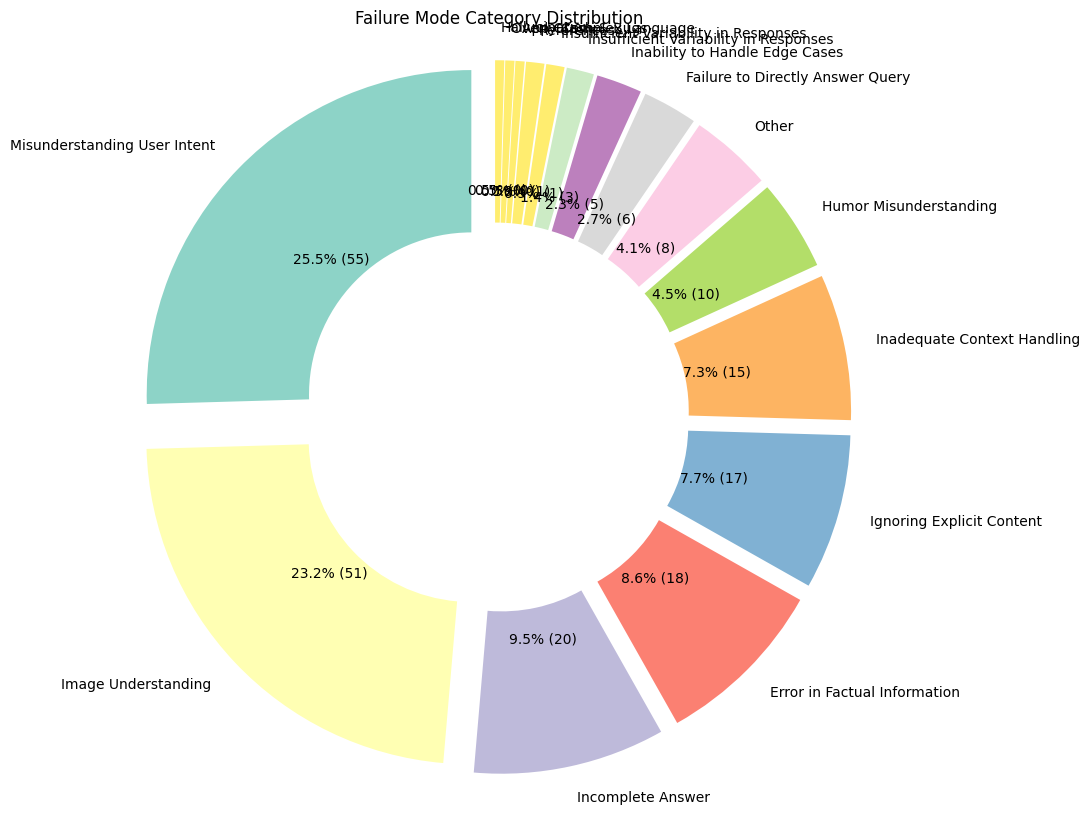

In [ ]:
data_failure_breakdown['Failure Mode Category'].value_counts()
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_failure_breakdown is your DataFrame
# Get the value counts
data = data_failure_breakdown['Failure Mode Category'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))

# Custom color map for aesthetics
colors = plt.cm.Set3(range(len(data)))

# Explode all slices slightly for visual separation
explode = [0.1] * len(data)

# Plotting the pie chart
plt.pie(data, labels=data.index, autopct=lambda p: '{:.1f}% ({:d})'.format(p, int(p * sum(data)/100)),
        startangle=90, colors=colors, explode=explode, wedgeprops=dict(width=0.5))

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Title of the chart
plt.title('Failure Mode Category Distribution')

# Display the chart
plt.show()

In [ ]:

# data_format = """
# # 🤸USER[turn #1]

# {post}


# <!--- -=-==--=-=--=-=-===-=-=-----=-=-==-==-=-====- -->
# # 🤖ASSISTANT[turn #1][👎]

# {intention}


# <!--- -=-==--=-=--=-=-===-=-=-----=-=-==-==-=-====- -->
# # 📝RUBRIC[turn #1]

# {rubrics}
# """


data_format =  """
# 🤸USER[turn #1]

{post}
{rubrics}


<!--- -=-==--=-=--=-=-===-=-=-----=-=-==-==-=-====- -->
# 🤖ASSISTANT[turn #1][👎]

{intention}


<!--- -=-==--=-=--=-=-===-=-=-----=-=-==-==-=-====- -->
# 📝RUBRIC[turn #1]

{rubrics}
"""
# !mkdir /Users/yuchen/data_ga_failure1205/intention
# output_folder = "/Users/yuchen/data_ga_failure1205"
output_folder = "/Users/yuchen/searchai/searchai/grok_chat/src/grok_chat/test/evals/tweet_analyze/failures/"
for index, row in data_failure_breakdown.iterrows():
  failure_mode = row['Failure Mode Category'].replace(" ", "_")
  data_temp = data_format.format(post=row['original_url'].replace("data_", ""), rubrics=row['Rubrics'], intention=row['intent_taxonomy'])
  ids = row['share_link'].replace("https://x.com/i/grok/share/", "")
  with open(f"{output_folder}/{index}_{failure_mode}_{ids}.md", "w") as f:
    f.write(data_temp)
  if 'intent' in failure_mode.lower():
    with open(f"{output_folder}/intention/{index}_{failure_mode}_{ids}.md", "w") as f:
      f.write(data_temp)
print('done')

done


# Prep XPO Preference data

In [ ]:
# ! cd /Users/yuchen/searchai/searchai/grok_chat ; uv run src/grok_chat/evals/batch_grok.py --path /Users/yuchen/ga/test_pr_results.csv --output_name test_pr_results_1206  --model_name=grok-2v-mini-1129  --output_trace_dir /Users/yuchen/ga/ga_traces_1206v2/


In [ ]:


import os
import csv
import json

RATINGS  = {"Amazing": 2, "Good": 1, "Bad": 0}

trace_dirs= "/Users/yuchen/ga/ga_traces_1206v2"
base_dir = "/Users/yuchen/ga/"
preference1_file = "test_pr_results.csv"
preference1_file = "grok_analyze_batch1and2_7p_and_3p_new_main_results.csv"
preference1_starfeet = "GA_Data_Collection_1206_FaCpC43jzO797swhTyy5u_annotations_2024-12-07T08-49-13-431Z.json"
# preference2_file = "test_pr_results_1206_results.csv"
preference2_file = preference1_file

selection_data = json.load(open(os.path.join(base_dir, preference1_starfeet), "r"))
selection = {}
rating = {}
count = 0
for k, v in selection_data.items():
  selection[v['original_url']] = [int(i) for i in v['build_response']]
  number_rating = {'new_analyze_rating': RATINGS[v['new_analyze_rating']], 'original_analyze_rating': RATINGS[v['original_analyze_rating']]}
  if number_rating['new_analyze_rating'] + number_rating['original_analyze_rating'] == 0:
    print(v['new_analyze_rating'], v['original_analyze_rating'])
    count+=1
    continue
  rating[v['original_url']] = number_rating
print(count)
# print(json.dumps(selection['3jOypXzFwu841PnsPbdOn'], indent=2))
preference1 = csv.reader(open(os.path.join(base_dir, preference1_file), "r"))
preference1_dict = dict([(r[0], r[1]) for r in preference1])

for k in preference1_dict:
  all_7p = [r for r in preference1_dict[k].split("\n- ") if r]
  if k in selection:
    # if len(all_7p) !=7:
    #   print(len(all_7p))
    #   print(all_7p)
    preference1_dict[k] = "\n- ".join(all_7p[i-1] for i in selection[k] if i <= len(all_7p))

preference2 = csv.reader(open(os.path.join(base_dir, preference2_file), "r"))
preference2_dict = dict([(r[0], r[3]) for r in preference2])

trace_maps = {}
for trace_file in os.listdir(trace_dirs):
  trace_file_path = os.path.join(trace_dirs, trace_file)
  if "_Here_are" in trace_file:
    trace_name = convertback(trace_file.split("_Here_are")[0])
    trace = json.load(open(trace_file_path, "r"))
    trace_maps[trace_name] = trace


all_keys = set(set(preference1_dict.keys()) | set(preference2_dict.keys()) | set(trace_maps.keys()) | set(selection.keys()))
print(len(all_keys))

Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
Bad Bad
42
8
['- **Topic**: The post asks for opinions on the best non-traditional Christmas movie, listing four films: "Bad Santa," "Gremlins," "Home Alone," and "Die Hard."\n', '**"Bad Santa"**: A comedy film where Billy Bob Thornton plays a conman posing as Santa to rob department stores. It\'s known for its dark humor and adult themes.[](https://www.imdb.com/title/tt0087363/)\n', '**"Gremlins"**: A movie where a young man gets a pet called a Mogwai, which turns into mischievous gremlins when exposed to water or fed after midnight. It\'s a blend of comedy, horror, and holiday themes set in the small town of Kingston Falls.[](https://screenrant.com/die-hard-chri

In [ ]:
print(list(preference2_dict.items())[0][1])

- **Advisory from Russia**: Russia has issued an urgent call for all its citizens to leave Syria immediately, indicating a significant escalation in security concerns or an impending conflict. 

- **Escalating Conflict**: This advisory comes in the context of increased military activity and control shifts within Syria, with opposition forces gaining ground, notably in Aleppo and Hama, suggesting a potential increase in instability.[](https://china.usembassy-china.org.cn/china-travel-advisory-2/)

- **Global Reaction**: Similar advisories from other nations like the US and India, urging their citizens to evacuate Syria, highlight the international concern over the rapidly deteriorating situation in the country.


In [ ]:
def convertback(s):
  s = s.replace("httpsx.com", "https://x.com/")
  ss = s.split("status")
  ss = ss[0] + "/" + 'status' + "/" + ss[1]
  return ss

def make_assistant_message(s):
  return {'role': 'Assistant', 'content_with_images': [{'type': 'text','content': s}]}

# print(list(preference2_dict.items())[1][1])

In [ ]:
all_data = []
for k in all_keys:
  if k in preference1_dict and k in preference2_dict and k in trace_maps and k in rating:
    trace = trace_maps[k]
    if rating[k]['new_analyze_rating'] + rating[k]['original_analyze_rating'] == 0:
      print( rating[k]['new_analyze_rating'], rating[k]['original_analyze_rating'])
      continue
    if rating[k]['new_analyze_rating'] >= rating[k]['original_analyze_rating']:
      response1, response2 = preference1_dict[k], preference2_dict[k]
      rating1, rating2 = rating[k]['new_analyze_rating'], rating[k]['original_analyze_rating']
      source1, source2 = '7p', '3p'
    else:
      response2, response1 = preference1_dict[k] , preference2_dict[k]
      rating2, rating1 = rating[k]['new_analyze_rating'], rating[k]['original_analyze_rating']
      source2, source1 = '7p', '3p'
    conv1 = trace["messages"] + [make_assistant_message(response1)]
    conv2 = trace["messages"] + [make_assistant_message(response2)]
    # print(trace)
    data_row = {
        "Input": k,
        "conversation1": conv1,
        "conversation2": conv2,
        "response1":  response1,
        "response2":  response2,
        "rating1": rating1,
        "rating2": rating2,
        "source1": source1,
        "source2": source2,
    }
    all_data.append(data_row)
  # else:
  #   print("???",k , k in preference1_dict , k in preference2_dict , k in trace_maps , k in rating)

len(all_data)

??? https://x.com/FarabaughFB/status/1865099233050644881 True True False False
??? https://x.com/primetimesc2/status/1864663250563985845 True True False False
??? https://x.com/JRLawndragon/status/1865086570350420039 True True False False
??? https://x.com/AMCbiggums/status/1865057320960499922 True True False False
??? https://x.com/copdoc1/status/1865056926775595235 True True False False
??? https://x.com/MadannaDivine/status/1864925250628010351 True True True False
??? https://x.com/DrewDisneyDude/status/1864716631009567209 True True False False
??? https://x.com/JackPosobiec/status/1864438513640276047 True True False False
??? https://x.com/craigzLiszt/status/1864449367886975456 True True False False
??? https://x.com/DragonTraderZ/status/1865027706020126747 True True False False
??? https://x.com/WinnieSchola/status/1864550886178972077 True True False False
??? https://x.com/OldRowSports/status/1864811441691201900 True True False False
??? https://x.com/KreisJK/status/1864513591342

912

In [ ]:
json.dump(all_data, open(base_dir+ "ga_traces_1206v2_rm_allbad.json", "w"))


In [ ]:
# for data_row in all_data:
#   conv2_content = (data_row['conversation2'][-1]['content_with_images'][0]['content'])
#   if len(conv2_content.split("\n-")) != 3:
#     print(len(conv2_content.split("\n-")))
#     print(conv2_content)
#     # print(json.dumps(data_row['conversation2'], indent=2))

print(json.dumps([(k,v) for k,v in all_data[4].items() if 'conversation' not in k and "trace" not in k], indent=2))

[
  [
    "response1",
    "- **Quoted Post**: The post references a Grindr Unwrapped 2024 poll, which ranked the \"Hottest Men of 2024\" with Pedro Pascal at the top, Jonathan Bailey second, and Bad Bunny third. This ranking was part of a larger survey conducted by Grindr, a social networking app for gay, bi, trans, and queer people, to summarize the year's trends and user preferences.\n\n- **Pop Culture Reference**: Jonathan Bailey, mentioned in the X post, is an actor known for his roles in \"Bridgerton\" and \"Fellow Travelers,\" contributing to his popularity in 2024.\n\n- **Public Reaction**: The post indicates a reaction to the Grindr Unwrapped results, possibly showing support or commentary on the choices made by the app's user base.[](https://www.thepinknews.com/2024/12/05/grindr-unwrapped-2024-pedro-pascal-jonathan-bailey/)"
  ],
  [
    "response2",
    "- **Shoe Release**: The post by @Nezzzooo discusses the Nike Kobe 6 Protro \u201cIce Grinch\u201d shoes, which are highly 